<a href="https://colab.research.google.com/github/vlochub/MIT-Xpro-colab/blob/main/Module20Video1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction


One of the most succesful tasks Deep Learning has been able to tackle is **Natural Language Processing**. In short, the goal here is, using machine learning and large datasets, to give computers the ability to ingest a piece of language as input and return something useful, like predicting:
- "What’s the topic of this text?" (text classification)
- "Does this text contain abuse?" (content filtering)
- "Does this text sound positive or negative?" (sentiment analysis)
- "What should be the next word in this incomplete sentence?" (language modeling)
- "How would you say this in German?" (translation)
- "How would you summarize this article in one paragraph?" (summarization)

In this notebook we will look at a dataset of song lyrics and will train models that will predict the genre of the song among three possible options: Rock, Pop, and Hip-Hop. This correspond to a classification task.

We will cover how to preprocess the text using **standarization** and **tokenization**. Then, we will think on how to represent the words in a way that can be understood by a Deep Learning model. We'll talk about **one-hot encoding** and **word embeddings**, and we will also introduce **bag-of-words** using unigrams and bigrams.



## Text Preprocessing Fundamentals



Let us first understand how to encode text into something that can be processed by a deep-learning model.

**Vectorizing** text is the proces of transforming text into numeric tensors. The process is as follows:
1. Standarize: Remove punctuation, convert to lowercase etc.
2. Tokenize: Split the text into units (called "tokens"), such as characters or words or group of words.
3. Third, convert each token into a numerical vector. This will usually involve first indexing all tokens present in the data.

The first process is fairly standard and we won't consider any variations of it.

For tokenization, we will consider splitting into words. We will begin with **unigrams**, which means that we will consider each word separately. We will move later to consider **bigrams**, where the tokens will be all words and pair of consecutives words in the text. We'll see how this adds valuable context to our model.

We will begin by processing text as a set (bag) of tokens (words or group of words in our case). This is the simplest way to encode a piece of text.

You could either look at individual words (**unigrams**), or try to recover some local order information by looking at groups of consecutive token (**N-grams**).

For example, the sentence "the cat sat on the mat" becomes:

Using a bag of single words:
`{"cat", "mat", "on", "sat", "the"}`

With bigrams: `{"the", "the cat", "cat", "cat sat", "sat",
 "sat on", "on", "on the", "the mat", "mat"}`

In the case of vectorization, we will also consider different schemas. First, we will work with a binary representation of words called **one-hot encoding**, where each word is associated to a vector as large as the vocabulary size, and the entry will take value 0 or 1 depending if that word is present in the text or not. A next step will be to store not the presence, but the count of each word. Finally, we'll present a more sophisticated approach called **embedding**, where we represent words by real value dense vectors. In this case, the size of the vector will be smaller than the size of the vocabulary. Once we get to there we'll explain this in more detail.

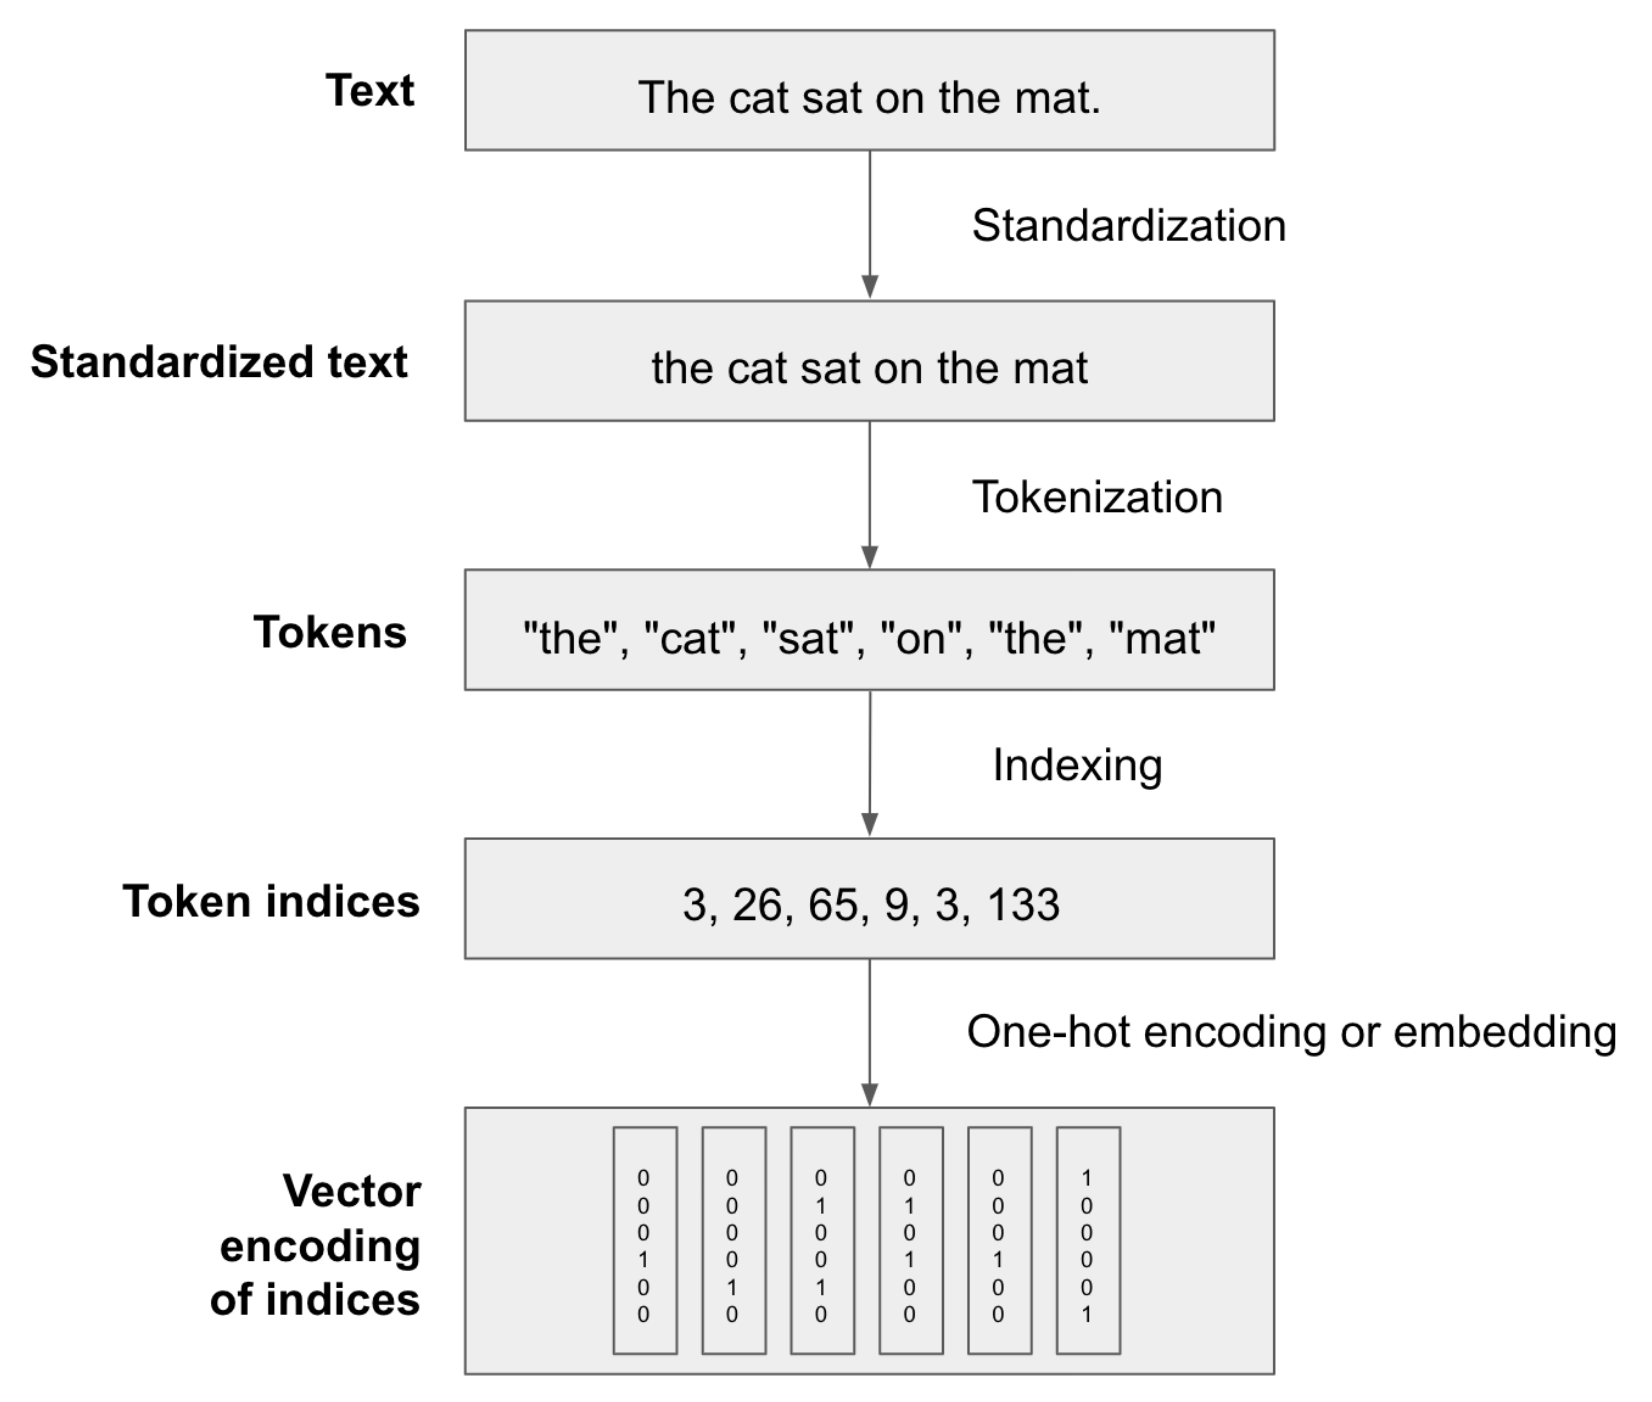
This seems like a lot, right?

Luckily for us, Keras has its own module that performs the three tasks above in a efficient and simple way using the `TextVectorization` layer.


## The TextVectorization Layer

Usual technical preliminaries ...

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

keras.utils.set_random_seed(42)

## **NLP1 Screen 1**

The following line "configures" a TextVectorization layer by telling it how we want the STIE process - Standardize, Tokenize, Index, Encode - to be done.


In this example,
- we use the default standarization which will remove punctuation and covert to lowercase.
- we use the default tokenization at a word level, by setting `split='whitespace'`.
- we set the output mode to `int` to indicate that we stop with just the index and not do any encoding for the moment.

In [ ]:
text_vectorization = keras.layers.TextVectorization(
    output_mode = 'int',
    standardize='lower_and_strip_punctuation',
    split='whitespace'
)

Now that the layer has been configured, we have to run it on a bunch of text to "populate" it.

We use the `adapt()` method for this.



In [ ]:
dataset = [
    "I write, erase, rewrite",
    "Erase again, and then",
    "A poppy blooms.",
    "Hola! are you laid-back in Mexico"
]

# Index vocabulary of the text
text_vectorization.adapt(dataset)


Once we do that, we can use `get_vocabulary()` to see what exactly has been done.


In [ ]:
# Retrieve the vocabulary
vocabulary = text_vectorization.get_vocabulary()
print('Vocabulary:')
print(vocabulary)



**Note:** When the output mode is 'int', the vocabulary will  index at 0 the null character `''`, and at 1 the `'[UNK]'` symbol which will be used for any word not present in the vocabulary.


Now that we have configured and populated the `TextVectorization` layer, we can run any sentence through it easily.

In [ ]:
# Encode and decode an example sentence
test_sentence = "I write, rewrite, and still rewrite again"
encoded_sentence = text_vectorization(test_sentence)
print(encoded_sentence)


We can see that the index 1 appears in the vector above. Recall that 1 stands for "unknown" i.e., [UNK].

**Why does 1 show up above?**



We can run this in reverse to confirm this.

In [ ]:
inverse_vocab = dict(enumerate(vocabulary))
decoded_sentence = " ".join(inverse_vocab[int(i)] for i in encoded_sentence)
print(decoded_sentence)

In the spirit of "make small changes to the code to really understand what's going on" ...

What do you think `text_vectorization("Sloan, HODL, DMD")` will be represented as?

<pre>















</pre>


In [ ]:
text_vectorization("Sloan, HODL, DMD")

Good, it is all 1s! Because these words weren't present in the text we used to populate the layer.


Now that we understand how the vectorization works, we will use the `TextVectorization` layer everytime we want to convert text into readable input for our Deep Learning Model.